### Building CNN from scratch using NUMPY

In [35]:
import numpy as np

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)


learning_rate = 1e-6
for t in range(500):
    # Forward pass: compute predicted y
    h = x.dot(w1) # 64x1000 * 1000x100 = 64x100
    h_relu = np.maximum(h, 0) # 64x100
    y_pred = h_relu.dot(w2) # 64x100 * 100x10 = 64x10

    # Compute and print loss
    loss = np.square(y_pred - y).sum() # 64x10 - 64x10
    print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y) # 64x10
    grad_w2 = h_relu.T.dot(grad_y_pred) # w2(100x10) = h_relu(100x64)T * grad_y_pred(64x10)
    grad_h_relu = grad_y_pred.dot(w2.T) # grad_y_pred(64x10) * w2.T(10x100)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h) # x.T(1000x64) * grad_h(64x100)

    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 35228885.96801229
1 33818567.45387314
2 32933327.298400056
3 28064905.42706217
4 19965694.90185131
5 11878602.105227016
6 6532613.000507953
7 3650357.822682472
8 2250062.6293039327
9 1550793.4229922974
10 1170463.5670369354
11 935917.138852603
12 774500.1099902054
13 653735.0684409277
14 558683.9809516706
15 481532.96367361996
16 417753.1691603911
17 364370.877013983
18 319286.1970305218
19 280940.7306979033
20 248209.422384756
21 220035.7505154314
22 195678.63477124705
23 174541.76319597178
24 156131.11826821862
25 140079.6653651437
26 125986.79388400455
27 113598.04765847807
28 102659.75763228486
29 92975.86266835526
30 84372.76148474924
31 76709.33715699028
32 69872.63168356098
33 63749.549586545094
34 58250.03252869916
35 53309.24000769376
36 48851.75334887765
37 44824.47727212152
38 41179.93861050519
39 37874.15607804844
40 34874.416693823834
41 32147.010290277136
42 29661.8402092068
43 27394.874325549776
44 25326.200034064743
45 23434.300004445573
46 21702.44690256509
47 20114.

In [36]:
import matplotlib.pyplot as plt

In [37]:
lss

[]

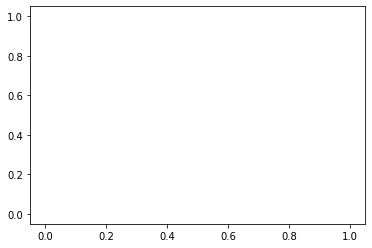

In [38]:
plt.plot(lss)